# Librerias

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers, Input
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

2024-08-04 13:48:30.285570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 13:48:30.285598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 13:48:30.329090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 13:48:30.363244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
for _ in train_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [6]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-08-04 13:48:36.543020: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-04 13:48:36.693082: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-04 13:48:36.693421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

2024-08-04 13:48:37.201709: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.
2024-08-04 13:48:37.664369: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/25


I0000 00:00:1722797318.402593  144721 service.cc:145] XLA service 0x746ef8004e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722797318.402630  144721 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-04 13:48:38.449292: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-04 13:48:38.576194: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6808 - loss: 0.6203

I0000 00:00:1722797319.467838  144721 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7021 - loss: 0.6026

2024-08-04 13:48:40.383477: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2024-08-04 13:48:40.711054: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7046 - loss: 0.6005 - val_accuracy: 0.8606 - val_loss: 0.4188
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8927 - loss: 0.3582 - val_accuracy: 0.8851 - val_loss: 0.3286
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9213 - loss: 0.2624 - val_accuracy: 0.8899 - val_loss: 0.2924
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9327 - loss: 0.2138 - val_accuracy: 0.8857 - val_loss: 0.2859
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9488 - loss: 0.1718 - val_accuracy: 0.8852 - val_loss: 0.2842
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9576 - loss: 0.1432 - val_accuracy: 0.8879 - val_loss: 0.2785
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9633 - loss: 0.1255 - val_accuracy: 0.8851 - val_loss: 0.2866
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9703 - loss: 0.1055 - val_accuracy: 0.8836 - val_loss: 0.2

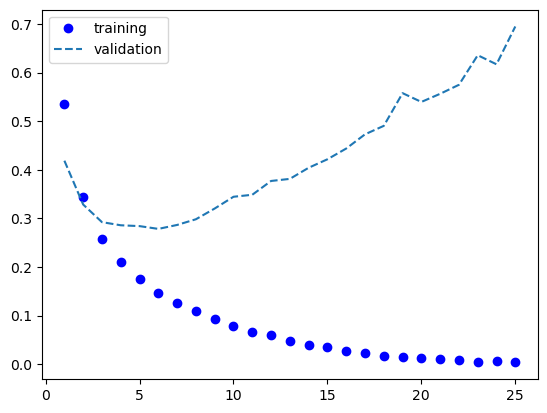

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

MALDITO OVERFITING!!!!!!

# Reduciendo el overfitting

## Reducir el modelo

2024-08-04 13:48:50.642545: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6537 - loss: 0.6240 - val_accuracy: 0.8116 - val_loss: 0.4736
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8823 - loss: 0.4075 - val_accuracy: 0.8708 - val_loss: 0.3744
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9222 - loss: 0.3028 - val_accuracy: 0.8841 - val_loss: 0.3234
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9366 - loss: 0.2449 - val_accuracy: 0.8887 - val_loss: 0.2986
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9490 - loss: 0.2010 - val_accuracy: 0.8818 - val_loss: 0.2998
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9565 - loss: 0.1702 - val_accuracy: 0.8832 - val_loss: 0.2847
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9641 - loss: 0.1482 - val_accuracy: 0.8854 - val_loss: 0.2833
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9715 - loss: 0.1244 - val_accuracy: 0.8838 - v

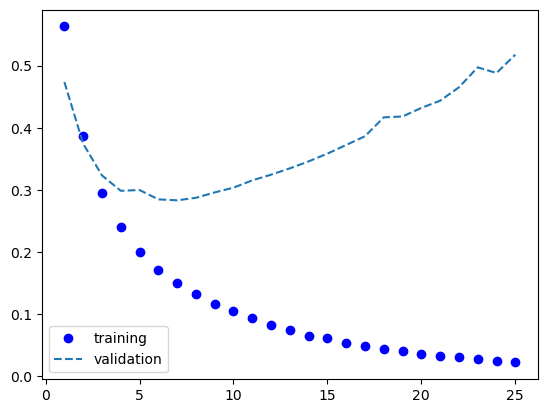

In [15]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

## Regularizacion

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6519 - loss: 1.1451 - val_accuracy: 0.8345 - val_loss: 0.6586
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8495 - loss: 0.6288 - val_accuracy: 0.8493 - val_loss: 0.5943
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8559 - loss: 0.5713 - val_accuracy: 0.8540 - val_loss: 0.5571
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8669 - loss: 0.5336 - val_accuracy: 0.8577 - val_loss: 0.5322
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8705 - loss: 0.5081 - val_accuracy: 0.8629 - val_loss: 0.5121
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8737 - loss: 0.4904 - val_accuracy: 0.8664 - val_loss: 0.4981
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8782 - loss: 0.4756 - val_accuracy: 0.8548 - val_loss: 0.5071
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8772 - loss: 0.4704 - val_accuracy: 0.8696 - v

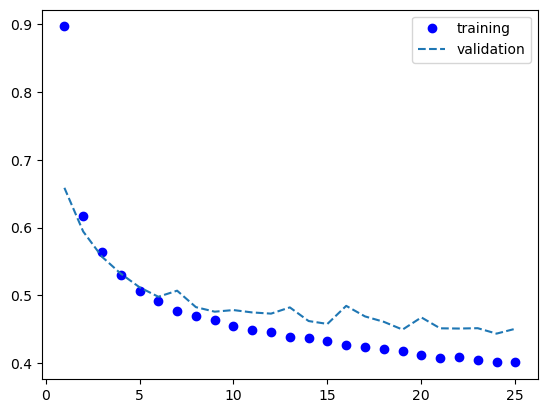

In [16]:
from keras import regularizers

model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

parece bueno pero en realidad tambien es un mojon

## Dropout

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5598 - loss: 0.6777 - val_accuracy: 0.7848 - val_loss: 0.5904
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7181 - loss: 0.5843 - val_accuracy: 0.8655 - val_loss: 0.4847
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7751 - loss: 0.5082 - val_accuracy: 0.8708 - val_loss: 0.4120
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8317 - loss: 0.4323 - val_accuracy: 0.8826 - val_loss: 0.3543
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8592 - loss: 0.3732 - val_accuracy: 0.8890 - val_loss: 0.2941
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8836 - loss: 0.3249 - val_accuracy: 0.8853 - val_loss: 0.2929
Epoch 7/25
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9056 - loss: 0.2769

2024-08-04 13:49:25.230524: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 20482048 bytes after encountering the first element of size 20482048 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9046 - loss: 0.2784 - val_accuracy: 0.8916 - val_loss: 0.2732
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9115 - loss: 0.2618 - val_accuracy: 0.8895 - val_loss: 0.2734
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9257 - loss: 0.2272 - val_accuracy: 0.8911 - val_loss: 0.2758
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9351 - loss: 0.1975 - val_accuracy: 0.8912 - val_loss: 0.2859
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9402 - loss: 0.1803 - val_accuracy: 0.8872 - val_loss: 0.2949
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9477 - loss: 0.1677 - val_accuracy: 0.8910 - val_loss: 0.3167
Epoch 13/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9464 - loss: 0.1567 - val_accuracy: 0.8879 - val_loss: 0.3329
Epoch 14/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9547 - loss: 0.1377 - val_accuracy: 0.8863 - val_loss: 0.349

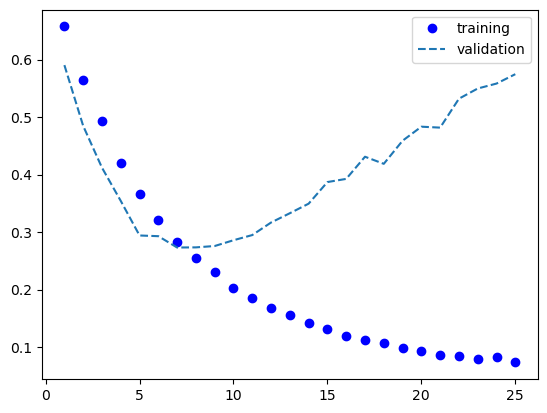

In [17]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=25, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

## El mio

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.5008 - loss: 0.7930 - val_accuracy: 0.5211 - val_loss: 0.7114
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5281 - loss: 0.7118 - val_accuracy: 0.5688 - val_loss: 0.6592
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5452 - loss: 0.6763 - val_accuracy: 0.6923 - val_loss: 0.6312
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5868 - loss: 0.6542 - val_accuracy: 0.7729 - val_loss: 0.6136
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6213 - loss: 0.6388 - val_accuracy: 0.8387 - val_loss: 0.5970
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6484 - loss: 0.6258 - val_accuracy: 0.8516 - val_loss: 0.5804
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6637 - loss: 0.6156 - val_accuracy: 0.8623 - val_loss: 0.5691
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6763 - loss: 0.6085 - val_accuracy: 0.8643 - 

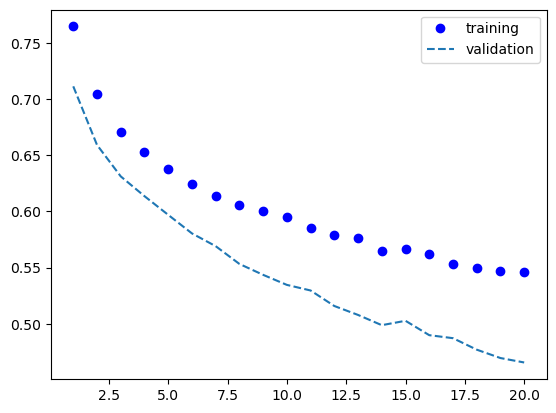

In [18]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # Usar Input para especificar la forma de entrada
model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l1(0.0001)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training')
plt.plot(epochs, val_loss_values, '--', label='validation')
plt.legend()
plt.show()